In [72]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [73]:
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


In [74]:
data['TV_Log'] = data['TV'].apply(np.log)
data['TV_Sqrt'] = data['TV'].apply(np.sqrt)
data['Radio_Log'] = data['Radio'].apply(np.log)
data['Radio_Sqrt'] = data['Radio'].apply(math.sqrt)
data['Newspaper_Log'] = data['Newspaper'].apply(np.log)
data['Newspaper_Sqrt'] = data['Newspaper'].apply(np.sqrt)

features = data
features.replace([np.inf, -np.inf], np.nan)
features.dropna(inplace=True)
features = features.drop('Unnamed: 0', 1)

In [75]:
display(features.head())

,TV,Radio,Newspaper,Sales,TV_Log,TV_Sqrt,Radio_Log,Radio_Sqrt,Newspaper_Log,Newspaper_Sqrt
0,230.100,37.800,69.200,22.100,5.439,15.169,3.632,6.148,4.237,8.319
1,44.500,39.300,45.100,10.400,3.795,6.671,3.671,6.269,3.809,6.716
2,17.200,45.900,69.300,9.300,2.845,4.147,3.826,6.775,4.238,8.325
3,151.500,41.300,58.500,18.500,5.021,12.309,3.721,6.427,4.069,7.649
4,180.800,10.800,58.400,12.900,5.197,13.446,2.380,3.286,4.067,7.642


## Multivariate Normality

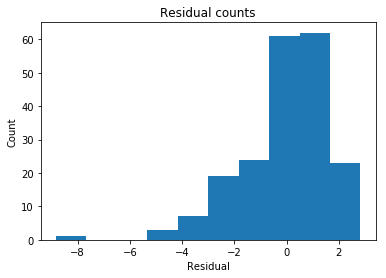

In [76]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

## Homoscedasticity

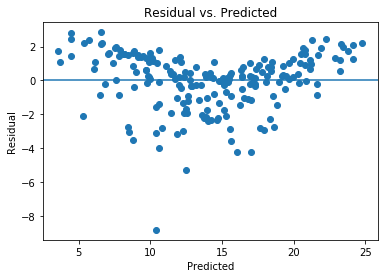

In [77]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

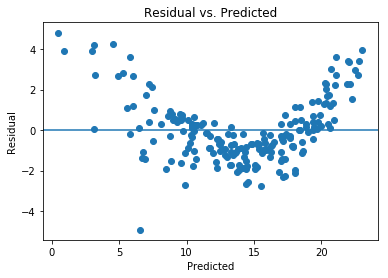

In [84]:
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
A = features['Sales'].values.reshape(-1, 1)
B = features[['TV_Sqrt','Radio_Sqrt','Newspaper_Sqrt']]
regr.fit(B, A)

predicted_log = regr.predict(B).ravel()
actual_log = features['Sales']

residual_log = actual_log - predicted_log

plt.scatter(predicted_log, residual_log)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Low Multicollinearity

In [6]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000
